Improving Performance Metrics (Recall and Accuracy)

Current Best Model - **Random Forests**
Current Best Metrics - 

Random Forest Classifier : 

- **Accuracy** :  0.9637
- Precision :  0.6257
- **Recall** :  0.8585
- F1 Score :  0.6811

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [26]:
curr_data = pd.DataFrame()
curr_data = pd.read_csv('cleaned_financial_data.csv')
curr_data = curr_data[[ 'Name',
                        'Total income',
                        'Sales',
                        'Net sales',
                        'Sales / Net fixed assets',
                        'Change in stock',
                        'Total expenses',
                        'Profit after tax',
                        'Profit after tax reported by company', 
                        'PBDITA',
                        'PBPT',
                        'PBT',
                        'PBIT',
                        'Cash profit',
                        'Depreciation as % of PBDITA',
                        'PAT as % of PBDITA',
                        'Long term investments',
                        'Net property, plant and equipment',
                        'Gross property, plant and equipment',
                        'Long term loans & advances',
                        'Other long term assets',
                        'Change in working capital assets',
                        'Change in working capital',
                        'Change in total income',
                        'Change in PAT net of P&E',
                        'Creditors turnover (times)',
                        'Cash to current liabilities (times)',
                        'Current ratio (times)',
                        'Quick ratio (times)',
                        'Cash balance',
                        'Label']]

In [27]:
curr_data['Year'] = curr_data.groupby('Name').cumcount() + 1
curr_data.shape

(55077, 32)

In [28]:
curr_data = curr_data.sort_values(by = ['Name','Year'])
df_pivot = curr_data.pivot(index = 'Name', columns = 'Year')
df_pivot.columns = [f"{col[0]}_{col[1]}" for col in df_pivot.columns]
df_pivot.reset_index(inplace = True)
df_pivot = df_pivot.fillna(0)

In [29]:
y = df_pivot['Label_1']
df_pivot = df_pivot.drop(columns = ['Name','Label_1','Label_2','Label_3','Label_4','Label_5','Label_6','Label_7','Label_8','Label_9','Label_10','Label_11','Label_12']) # dropping the name to get the numeric columns only
X = df_pivot
categorical_columns = X.select_dtypes(include=['object']).columns # select the categorical columns
numeric_columns = X.select_dtypes(include=['number']).columns # select the numeric columns

- Encode Categorical Features (one-hot-encoding)
- Using StandardScaler to normalize the parameters
- SMOTE to oversample the minority class (Bankrupt companies)

In [30]:
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
X_categorical = encoder.fit_transform(X[categorical_columns])

In [31]:
scaler = StandardScaler()
X_numeric = scaler.fit_transform(X[numeric_columns])
X_processed = np.hstack((X_categorical,X_numeric)) # combine the categorical and numeric columns

In [32]:
feature_names = list(numeric_columns) + list(encoder.get_feature_names_out(categorical_columns))
X_processed_df = pd.DataFrame(X_processed, columns = feature_names)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, stratify=y, random_state=42)
smote = SMOTE(sampling_strategy='minority',k_neighbors=10, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [34]:
print(f"Processed Dataset :\n")
X_processed_df

Processed Dataset :



,Total income_1,Total income_2,Total income_3,Total income_4,Total income_5,Total income_6,Total income_7,Total income_8,Total income_9,Total income_10,...,Cash balance_3,Cash balance_4,Cash balance_5,Cash balance_6,Cash balance_7,Cash balance_8,Cash balance_9,Cash balance_10,Cash balance_11,Cash balance_12
0,-0.070694,-0.076331,-0.084296,-0.082353,-0.080291,-0.076351,-0.072878,-0.079891,-0.077234,-0.076517,...,-0.046896,-0.047232,-0.046155,-0.042118,-0.044123,-0.042928,-0.044660,-0.044035,-0.044835,-0.013651
1,-0.078996,-0.072623,-0.078062,-0.074488,-0.047481,-0.064172,-0.067759,-0.053901,-0.072893,-0.069354,...,-0.031200,-0.047661,-0.046508,-0.041179,-0.044634,-0.043257,-0.044711,-0.044232,-0.045050,-0.013651
2,-0.097062,-0.106597,-0.120653,-0.117179,-0.112203,-0.105060,-0.104863,-0.109515,-0.106259,-0.105311,...,-0.047087,-0.047919,-0.046649,-0.042807,-0.044634,-0.043421,-0.044509,-0.044257,-0.045076,-0.013651
3,-0.048588,-0.059146,0.024909,-0.071602,-0.076646,-0.059464,-0.076761,-0.060618,-0.089183,-0.085366,...,-0.047279,-0.047919,-0.046684,-0.042807,-0.044688,-0.043421,-0.044736,-0.044257,-0.045076,-0.013651
4,0.061831,0.072625,0.116380,0.125313,0.112541,0.097098,0.107228,0.078829,0.075409,0.075606,...,-0.047279,-0.047919,-0.046684,-0.042807,-0.044688,-0.043421,-0.044736,-0.044257,-0.045076,-0.013651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5362,-0.093163,-0.101757,-0.114857,-0.111805,-0.107314,-0.101693,-0.102681,-0.105857,-0.100172,-0.098535,...,-0.047164,-0.047790,-0.046649,-0.042745,-0.044634,-0.043398,-0.044736,-0.044232,-0.045076,-0.013651
5363,0.370853,0.408233,0.452511,0.285237,0.295898,0.268056,0.119311,0.066814,0.048516,-0.025935,...,-0.043106,-0.047919,-0.046614,-0.042776,-0.044634,-0.043398,-0.044736,-0.044257,-0.045076,-0.013651
5364,-0.076471,-0.099558,-0.116921,-0.115454,-0.110651,-0.103471,-0.098988,-0.038928,-0.059325,-0.060091,...,-0.047240,-0.047919,-0.046684,-0.042807,-0.044688,-0.043375,-0.044635,-0.044133,-0.044996,-0.013651
5365,0.302492,0.420159,0.670989,0.258333,0.406908,0.405468,0.462803,0.511395,0.373589,0.350226,...,-0.044599,-0.046201,-0.045626,-0.041554,-0.044150,-0.042952,-0.044483,-0.044257,-0.044809,-0.013651


In [35]:
def print_metrics(clf,y_test,y_pred):
    accuracy = metrics.accuracy_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred, average='macro')
    recall = metrics.recall_score(y_test,y_pred, average='macro')
    f1 = metrics.f1_score(y_test,y_pred, average='macro')
    print(f"For the {clf} Classifier: \n")
    print(f"Accuracy : {accuracy: .4f}")
    print(f"Precision : {precision : .4f}")
    print(f"Recall : {recall : .4f}")
    print(f"F1 Score : {f1 : .4f}")

In [36]:
def print_confusion_matrix(clf,y_test,y_pred):
    cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
    normalized_cnf_matrix = cnf_matrix.astype('float')/cnf_matrix.sum(axis = 1)[:,np.newaxis]
    # cnf_matrix
    plt.figure(figsize = (12,8))
    sns.heatmap(cnf_matrix, annot = True, fmt = '.2f')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"The Confusion Matrix for the {clf} Classifier")
    plt.show()
    # normalized_cnf_matrix
    plt.figure(figsize = (12,8))
    sns.heatmap(normalized_cnf_matrix, annot = True, fmt = '.2f')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"The Normalized Confusion Matrix for {clf} Classifier: ")

In [37]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 5, random_state=42),
    "Random Forest": RandomForestClassifier(criterion = 'gini', n_estimators = 200, max_depth = 10, min_samples_split = 5, random_state=42)
}

In [38]:
clf_dt = classifiers["Decision Tree"]
clf_rf = classifiers["Random Forest"]

For the Decision Tree Classifier: 

Accuracy :  0.9246
Precision :  0.5398
Recall :  0.6847
F1 Score :  0.5540


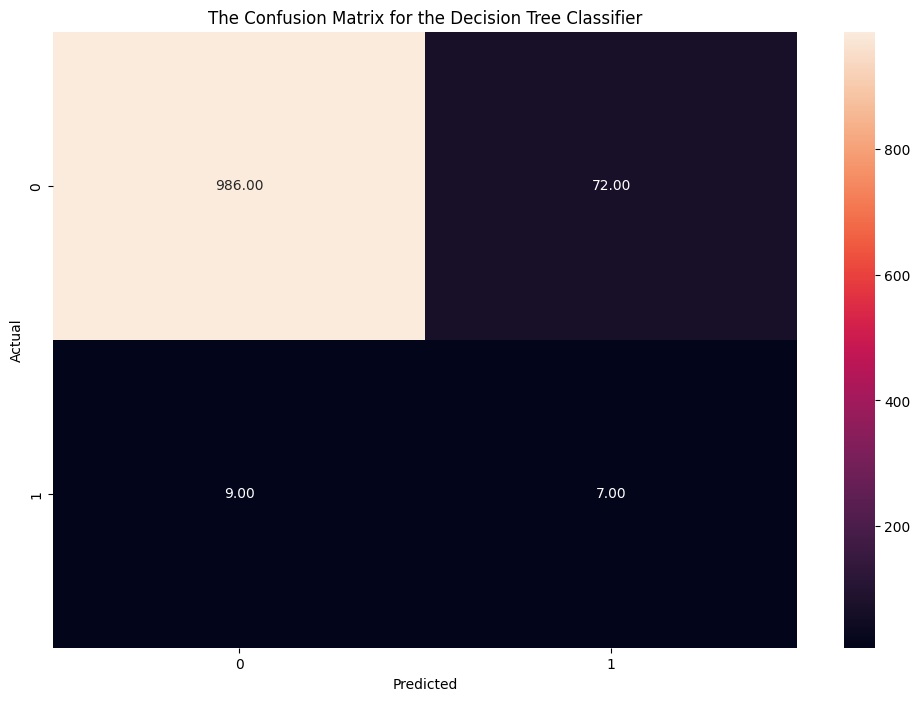

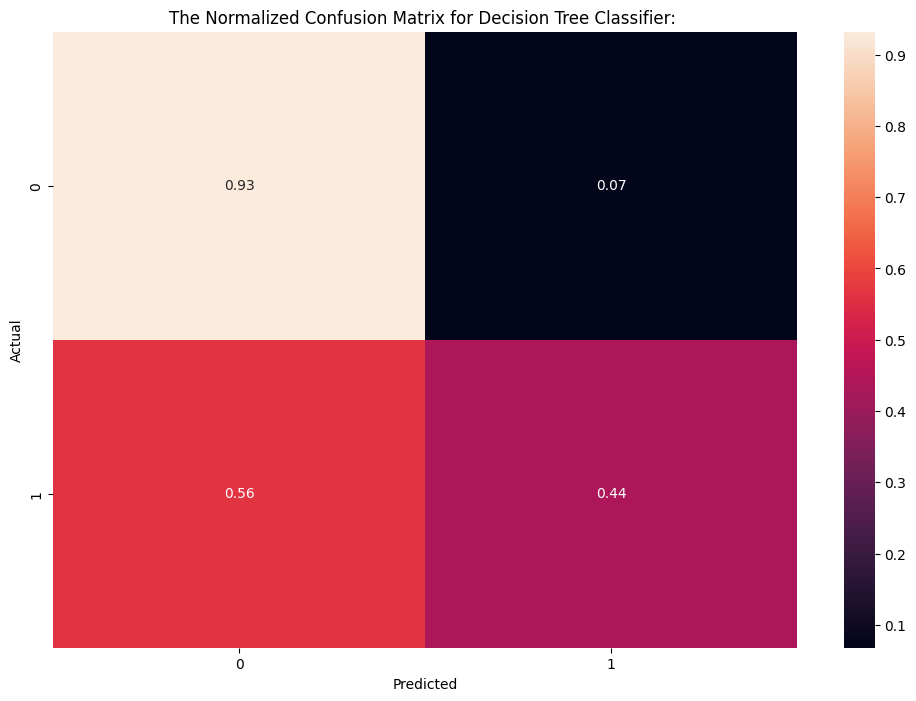

In [39]:
clf_dt.fit(X_train_resampled, y_train_resampled)
y_pred = clf_dt.predict(X_test)
print_metrics("Decision Tree",y_test,y_pred)
print_confusion_matrix("Decision Tree",y_test,y_pred)

For the Random Forest Classifier: 

Accuracy :  0.9637
Precision :  0.6257
Recall :  0.8585
F1 Score :  0.6811


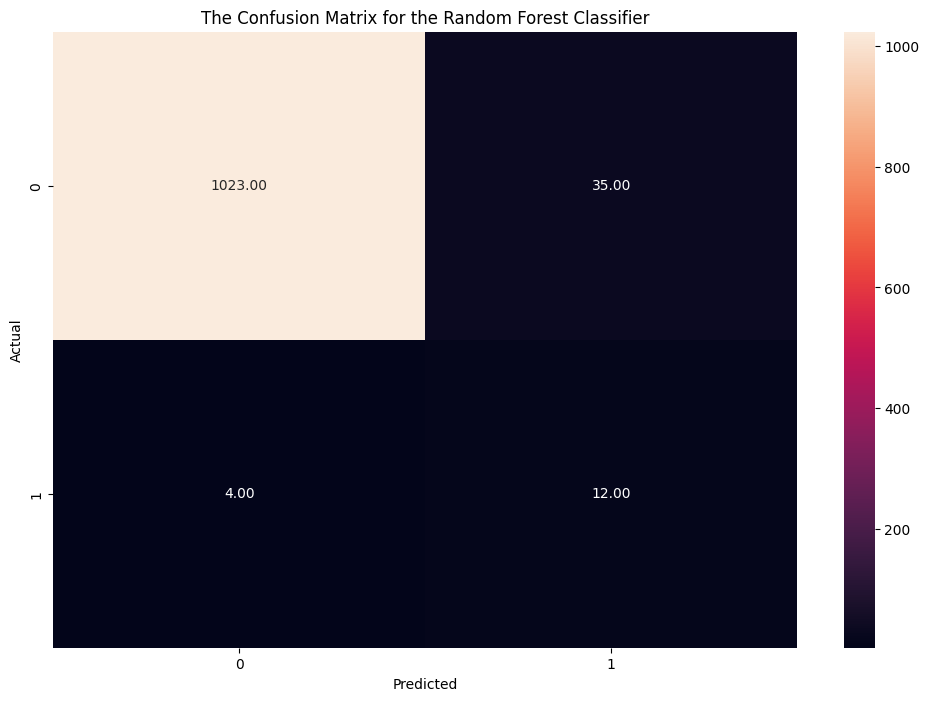

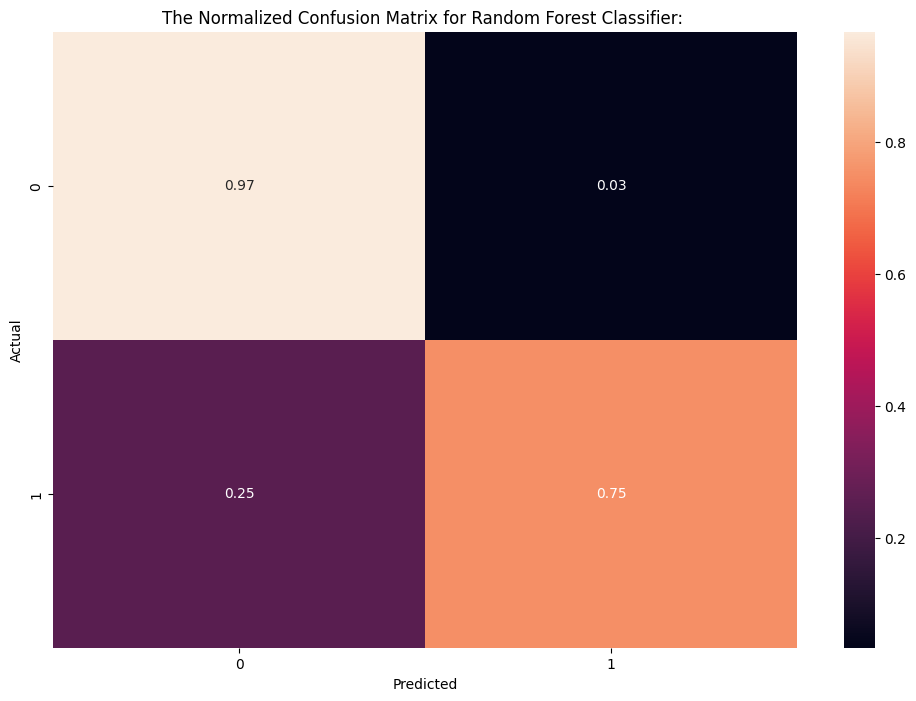

In [40]:
clf_rf.fit(X_train_resampled, y_train_resampled)
y_pred = clf_rf.predict(X_test)
print_metrics("Random Forest",y_test,y_pred)
print_confusion_matrix("Random Forest",y_test,y_pred)